**Study Hours and Test Scores**

- Columns: Study_Hours (Categorical: "<5", "5-10", ">10"), Test_Score (Continuous)
- Data Simulation: Use np.random.normal to create different mean scores for each study hour group.

**Hypothesis**:
Null: There is no significant difference in test scores across study hour groups.

Alternative: There is a significant difference in test scores across study hour groups.

/tmp/ipykernel_18571/2920251598.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Study_Hours', y='Test_Score', data=data, palette="Set2")


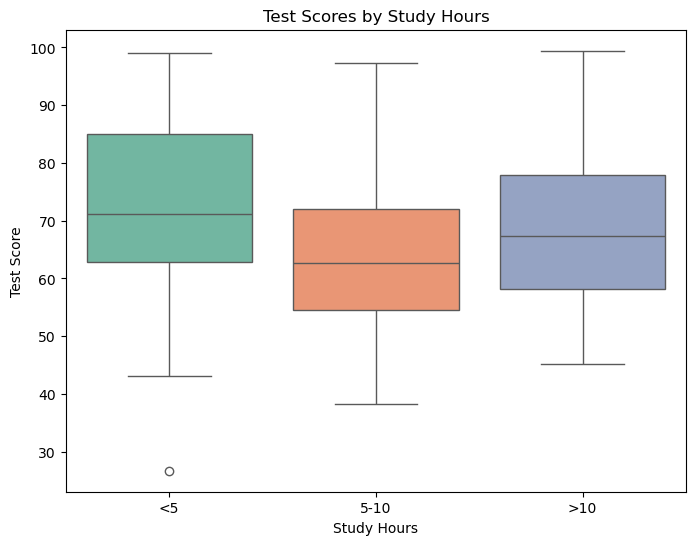

ANOVA Result: F=2.22, p-value=0.1145
Conclusion: Fail to reject the null hypothesis. No significant difference in test scores between study hour groups.


In [28]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create Synthetic Dataset with Smaller Differences and Higher Variance
np.random.seed(0)
data = pd.DataFrame({
    'Study_Hours': np.repeat(['<5', '5-10', '>10'], 30),
    'Test_Score': np.concatenate([
        np.random.normal(65, 15, 30),  # "<5" hours group, mean closer to others and higher std dev
        np.random.normal(68, 15, 30),  # "5-10" hours group
        np.random.normal(71, 15, 30)   # ">10" hours group
    ])
})

# Step 2: Perform ANOVA Test
groups = [data['Test_Score'][data['Study_Hours'] == hour] for hour in data['Study_Hours'].unique()]
anova_result = stats.f_oneway(*groups)

# Step 3: Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='Study_Hours', y='Test_Score', data=data, palette="Set2")
plt.title('Test Scores by Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.show()

# Step 4: Conclusion
alpha = 0.05
if anova_result.pvalue < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in test scores between study hour groups."
else:
    conclusion = "Fail to reject the null hypothesis. No significant difference in test scores between study hour groups."

print(f"ANOVA Result: F={anova_result.statistic:.2f}, p-value={anova_result.pvalue:.4f}")
print("Conclusion:", conclusion)


# Using Titanic Datasets

**Objective**:
- Test if the average age of passengers varies significantly by passenger class (Pclass).

**Hypothesis**:
- Null: There is no significant difference in average age across different passenger classes.
- Alternative: There is a significant difference in average age across different passenger classes.

<ipython-input-4-5a53e7f21e0e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='age', data=titanic_data, palette="Blues")


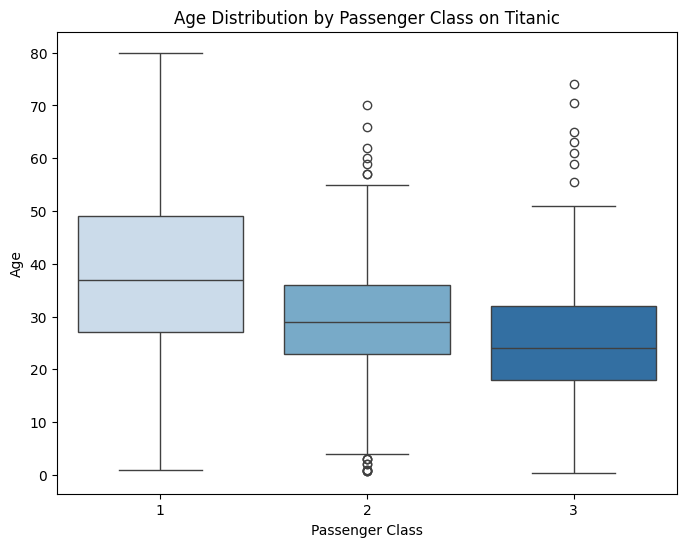

ANOVA Result: F=57.44, p-value=0.0000
Conclusion: Reject the null hypothesis. There is a significant difference in age across passenger classes.


In [ ]:
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')

# Drop missing age data for analysis
titanic_data = titanic_data.dropna(subset=['age'])

# ANOVA Test: Average Age by Passenger Class
groups = [titanic_data['age'][titanic_data['pclass'] == pclass] for pclass in titanic_data['pclass'].unique()]
anova_result = stats.f_oneway(*groups)

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='age', data=titanic_data, palette="Blues")
plt.title('Age Distribution by Passenger Class on Titanic')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

# Conclusion
alpha = 0.04
if anova_result.pvalue < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in age across passenger classes."
else:
    conclusion = "Fail to reject the null hypothesis. No significant difference in age across passenger classes."

print(f"ANOVA Result: F={anova_result.statistic:.2f}, p-value={anova_result.pvalue:.4f}")
print("Conclusion:", conclusion)


**Two-Way ANOVA (with Interaction)**
_ Question 1:
- Investigate whether the mean sales of a product differ based on two factors: region (North, South, East, West) and season (Winter, Summer). Perform a two-way ANOVA and analyze if there is an interaction effect between region and season.

                        df        sum_sq      mean_sq          F        PR(>F)
C(Region)              3.0    265.438655    88.479552   1.007418  3.906249e-01
C(Season)              1.0   6637.806033  6637.806033  75.577265  1.550718e-15
C(Region):C(Season)    3.0      4.437241     1.479080   0.016841  9.970142e-01
Residual             192.0  16862.991278    87.828080        NaN           NaN


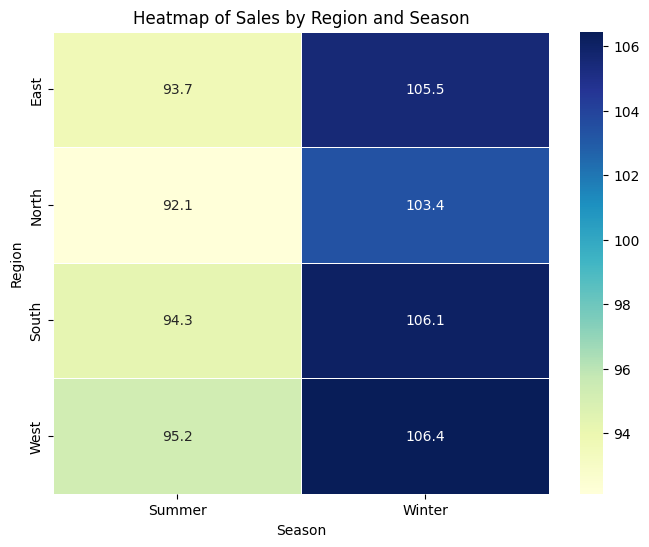

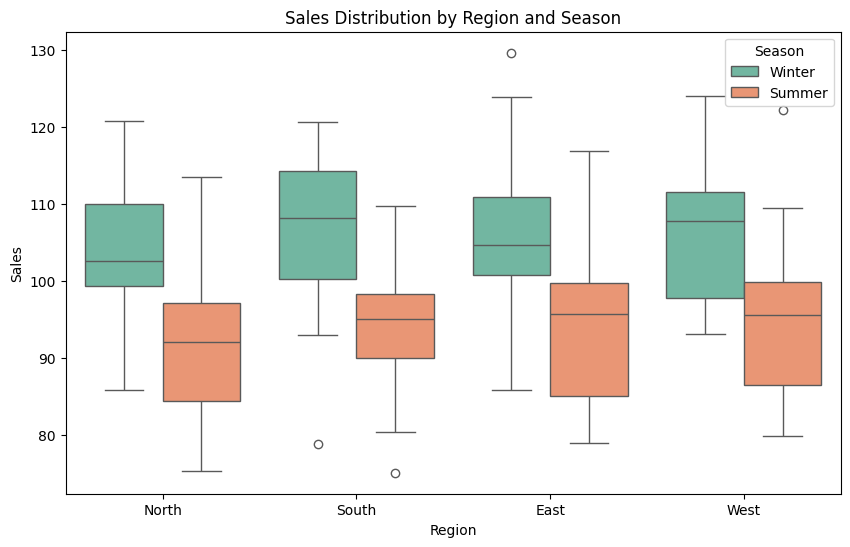

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Create a simulated dataset
np.random.seed(42)
data = {
    'Region': np.repeat(['North', 'South', 'East', 'West'], 50),
    'Season': np.tile(np.repeat(['Winter', 'Summer'], 25), 4),
    'Sales': np.random.normal(loc=100, scale=10, size=200) + np.tile(np.repeat([5, -5], 25), 4)
}

df = pd.DataFrame(data)

# Perform the two-way ANOVA
model = ols('Sales ~ C(Region) * C(Season)', data=df).fit()
anova_results = anova_lm(model)

print(anova_results)

# Interpretation: p-value < 0.05 indicates significant differences between factors or interaction.

# Create a heatmap for the interaction between Region and Season
pivot_table = df.pivot_table('Sales', 'Region', 'Season', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5)
plt.title('Heatmap of Sales by Region and Season')
plt.xlabel('Season')
plt.ylabel('Region')
plt.show()

# Boxplot to visualize the distribution of sales for each Region and Season combination
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Sales', hue='Season', data=df, palette="Set2")
plt.title('Sales Distribution by Region and Season')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.legend(title='Season')
plt.show()

**Repeated Measures ANOVA**

Question 2:
- Investigate if there is a significant difference in students’ test scores before, during, and after an intervention program (Test 1, Test 2, Test 3) using a repeated measures ANOVA.

              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
Test 16.5278 2.0000 38.0000 0.0000



<ipython-input-6-311878e7c61f>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Test', y='Score', data=df, ci=None, marker='o', hue='Test', palette="Set2")


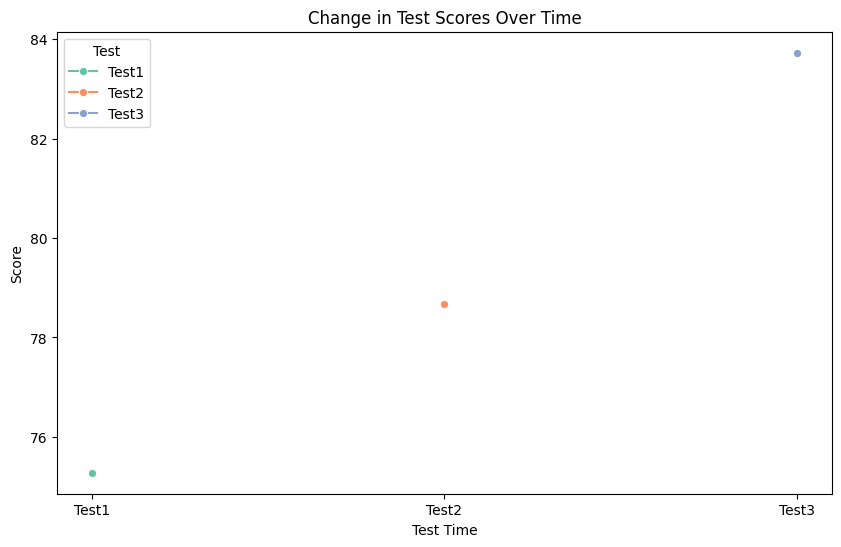

<ipython-input-6-311878e7c61f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Test', y='Score', data=df, palette="Set2")


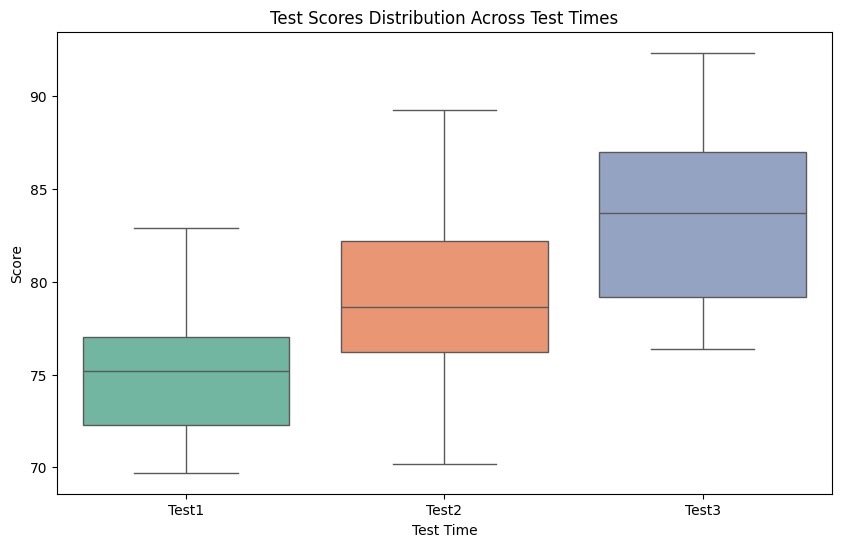

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
'''
1. import statsmodels.api as sm
statsmodels is a Python package that provides tools for statistical modeling, hypothesis testing, and statistical analysis.
It's similar to R's statistical capabilities, but tailored for Python.

api: This module provides access to the various functionalities within the statsmodels package.
By importing statsmodels.api as sm, you're allowing access to important statistical functions like regression, time series analysis, ANOVA, etc.

Common use cases in statsmodels.api include:
OLS (Ordinary Least Squares) regression: Used for linear regression.
Logistic regression: Used for modeling binary outcomes.
ANOVA: Analysis of Variance for testing hypotheses about group means.
ARIMA models: For time series forecasting.

2. from statsmodels.formula.api import ols
formula.api provides a convenient way to specify statistical models using a formula language similar to R's formula syntax.
ols: Stands for Ordinary Least Squares regression. It is used for performing linear regression analysis.
In the context of the ols function, the formula specifies the relationship between the dependent variable and independent variables.
'''
# Simulate a dataset
np.random.seed(42)
data = {
    'Student': np.repeat(np.arange(1, 21), 3),
    'Test': np.tile(['Test1', 'Test2', 'Test3'], 20),
    'Score': np.random.normal(loc=75, scale=5, size=60) + np.tile([0, 5, 10], 20)
}

df = pd.DataFrame(data)

# Perform the repeated measures ANOVA
rm_anova = AnovaRM(df, 'Score', 'Student', within=['Test']).fit()

print(rm_anova)

# Interpretation: p-value < 0.05 indicates significant differences between tests.

# Line plot to show the trend of scores over the tests for all students
plt.figure(figsize=(10, 6))
sns.lineplot(x='Test', y='Score', data=df, ci=None, marker='o', hue='Test', palette="Set2")
plt.title('Change in Test Scores Over Time')
plt.xlabel('Test Time')
plt.ylabel('Score')
plt.legend(title='Test')
plt.show()

# Boxplot to visualize the distribution of scores at each test time point
plt.figure(figsize=(10, 6))
sns.boxplot(x='Test', y='Score', data=df, palette="Set2")
plt.title('Test Scores Distribution Across Test Times')
plt.xlabel('Test Time')
plt.ylabel('Score')
plt.show()
